In [1]:
cd ..

/Users/kobaid/Desktop/Ryerson Courses/CIND 820/Initial Code and Results


In [4]:
ls

IntelligentNews_CodePlan.docx  requirements.txt
Module11.ipynb                 rough/
README.md                      scripts/
TO DO Coding and Results.docx  venv/
global_news/                   ~$ DO Coding and Results.docx
notebooks/                     ~$telligentNews_CodePlan.docx


In [ ]:
# install required libraries



In [5]:
# install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# load all datasets
data_df = pd.read_csv('global_news/data.csv')
rating_df = pd.read_csv('global_news/rating.csv')
raw_df = pd.read_csv('global_news/raw-data.csv', dtype='object')

# merge dataframes into master dataframe
master_df = pd.concat([data_df, rating_df, raw_df], axis=0)

FileNotFoundError: [Errno 2] No such file or directory: 'global_news/data.csv'

In [4]:
master_df.shape

(1096988, 14)

In [5]:
data_df.shape

(105375, 12)

In [6]:
data_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


# Sample Text Analysis

In [7]:
data_df.isnull().sum()

article_id          0
source_id       80880
source_name         0
author           8219
title              40
description       383
url                 0
url_to_image     5624
published_at        0
content             0
category           42
full_content    46943
dtype: int64

In [8]:
master_df.isnull().sum()

article_id               0
source_id           935194
source_name          65919
author              189829
title                66509
description          69729
url                 129108
url_to_image        193613
published_at        129108
content             129574
category            129553
full_content       1038556
article            1038632
title_sentiment    1038632
dtype: int64

In [10]:
data_df['published_at'].values

array(['2023-10-30 10:12:35.000000', '2023-10-06 04:40:02.000000',
       '2023-10-30 10:53:30.000000', ..., '2023-11-29 10:01:12',
       '2023-11-29 13:44:33', '2023-11-29 14:00:00'], dtype=object)

In [11]:
len(data_df['published_at'].values)

105375

In [12]:
# create array of dates
dates_arr = data_df['published_at'].values

In [14]:
# convert date column to pandas datetime object
data_df['published_datetime'] = pd.to_datetime(data_df['published_at'])

In [20]:
# create features for year, month, day, hour, minute
# and day of the week
data_df['publish_year'] = data_df['published_datetime'].dt.year
data_df['publish_month'] = data_df['published_datetime'].dt.month
data_df['publish_day'] = data_df['published_datetime'].dt.day
data_df['publish_hour'] = data_df['published_datetime'].dt.hour
data_df['publish_minute'] = data_df['published_datetime'].dt.minute

In [22]:
data_df['day_of_week'] = data_df['published_datetime'].dt.day_name()

In [23]:
data_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,published_datetime,publish_year,publish_month,publish_day,publish_hour,publish_minute,day_of_week
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,2023-10-30 10:12:35,2023,10,30,10,12,Monday
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,2023-10-06 04:40:02,2023,10,6,4,40,Friday
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,2023-10-30 10:53:30,2023,10,30,10,53,Monday
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,2023-10-06 01:20:24,2023,10,6,1,20,Friday
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN,2023-10-27 01:08:34,2023,10,27,1,8,Friday


In [ ]:
ma

In [1]:
import spacy

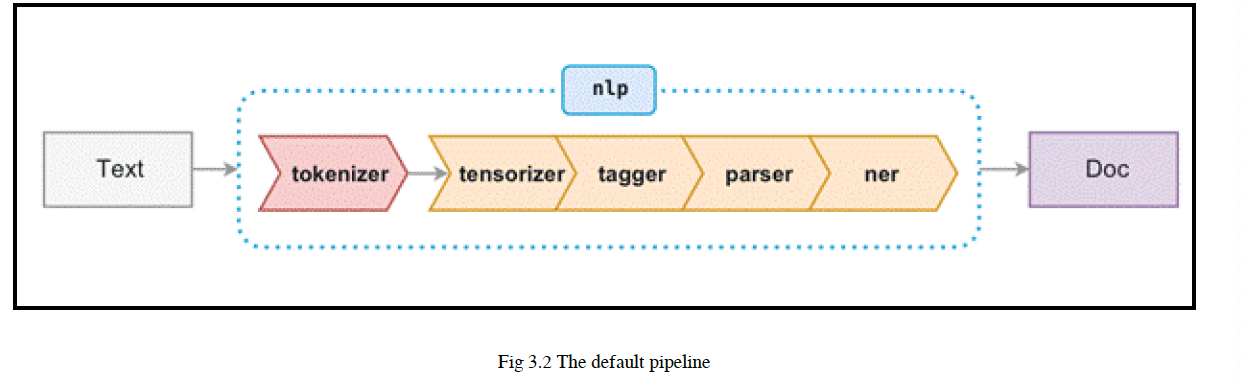

# SPEED Algorithm